<a href="https://colab.research.google.com/github/JyotsnaPatil27/Jyo_code/blob/master/REMOTE%40OSU/SensitivityFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, pickle, json, os
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Pre-Processed Data Files

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_1713_1.csv"))
df1 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_2124_1.csv"))
df2 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_2145_1.csv"))
df3 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_1713_1.csv"))
df4 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_2124_1.csv"))
df5 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_2145_1.csv"))
df6 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_AO_1713_1.csv"))
df7 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_GBT_1713_1.csv"))

In [ ]:
toa_1713 = list(df["TOA_1713"])
toa_err_1713 = list(df["TOA_ERR_1713"])
toa_2124 = list(df1["TOA_2124"])
toa_err_2124 = list(df1["TOA_ERR_2124"])
toa_2145 = list(df2["TOA_2145"])
toa_err_2145 = list(df2["TOA_ERR_2145"])

In [ ]:
toa_ng_1713 = list(df3["TOA_ng_1713"])
toa_err_ng_1713 = list(df3["TOA_ERR_ng_1713"])
toa_ng_2124 = list(df4["TOA_ng_2124"])
toa_err_ng_2124 = list(df4["TOA_ERR_ng_2124"])
toa_ng_2145 = list(df5["TOA_ng_2145"])
toa_err_ng_2145 = list(df5["TOA_ERR_ng_2145"])
toa_ng_ao_1713 = list(df6["TOA_ng_ao_1713"])
toa_err_ng_ao_1713 = list(df6["TOA_ERR_ng_ao_1713"])
toa_ng_gbt_1713 = list(df7["TOA_ng_gbt_1713"])
toa_err_ng_gbt_1713 = list(df7["TOA_ERR_ng_gbt_1713"])

In [ ]:
toa_ng_1713_1, indices_1713 = np.unique(toa_ng_1713, return_index=True)
toa_err_ng_1713_1 = np.take(toa_err_ng_1713, indices_1713)
toa_ng_2124_1, indices_2124 = np.unique(toa_ng_2124, return_index=True)
toa_err_ng_2124_1 = np.take(toa_err_ng_2124, indices_2124)
toa_ng_2145_1, indices_2145 = np.unique(toa_ng_2145, return_index=True)
toa_err_ng_2145_1 = np.take(toa_err_ng_2145, indices_2145)

In [ ]:
toa_ng_ao_1713_1, indices_ao_1713 = np.unique(toa_ng_ao_1713, return_index=True)
toa_err_ng_ao_1713_1 = np.take(toa_err_ng_ao_1713, indices_ao_1713)
toa_ng_gbt_1713_1, indices_gbt_1713 = np.unique(toa_ng_gbt_1713, return_index=True)
toa_err_ng_gbt_1713_1 = np.take(toa_err_ng_gbt_1713, indices_gbt_1713)

## Constructing Sensitivity Curves

In [ ]:
pip install hasasia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
import hasasia.sensitivity as hsen

In [ ]:
Pulsar= [1713, 2124,	2145]
phi = [4.510914992, 5.605695476, 5.697806205]
theta = [0.1360265, 0.558868921, 0.107538906]

In [ ]:
Tspan_1713 = toa_1713[-1] - toa_1713[0]
Tspan_2124 = toa_2124[-1] - toa_2124[0]
Tspan_2145 = toa_2145[-1] - toa_2145[0]

In [ ]:
freqs = np.logspace(np.log10(5e-10),np.log10(5e-7),500)

In [ ]:
fyr = 1/(365.25*24*3600)
freqs1 = np.logspace(np.log10(1/(5*Tspan_1713)),np.log10(2e-7),600)
freqs2 = np.logspace(np.log10(1/(5*Tspan_2124)),np.log10(2e-7),600)
freqs3 = np.logspace(np.log10(1/(5*Tspan_2145)),np.log10(2e-7),600)

In [ ]:
Tspan_ng_1713 = np.max(toa_ng_1713_1) - np.min(toa_ng_1713_1)
Tspan_ng_2124 = max(toa_ng_2124) - min(toa_ng_2124)
Tspan_ng_2145 = np.max(toa_ng_2145_1) - np.min(toa_ng_2145_1)
Tspan_ng_ao_1713 = np.max(toa_ng_ao_1713_1) - np.min(toa_ng_ao_1713_1)
Tspan_ng_gbt_1713 = np.max(toa_ng_gbt_1713_1) - np.min(toa_ng_gbt_1713_1)

In [ ]:
freqs4 = np.logspace(np.log10(1/(5*Tspan_ng_1713)),np.log10(2e-7),600)
freqs5 = np.logspace(np.log10(1/(5*Tspan_ng_2124)),np.log10(2e-7),600)
freqs6 = np.logspace(np.log10(1/(5*Tspan_ng_2145)),np.log10(2e-7),600)
freqs7 = np.logspace(np.log10(1/(5*Tspan_ng_ao_1713)),np.log10(2e-7),600)
freqs8 = np.logspace(np.log10(1/(5*Tspan_ng_gbt_1713)),np.log10(2e-7),600)

In [ ]:
psr_1713 = hsen.Pulsar(toas=np.array(toa_1713), toaerrs=(np.array(toa_err_1713))*1e-6, phi=phi[0], theta=theta[0])
psr_2124 = hsen.Pulsar(toas=np.array(toa_2124), toaerrs=(np.array(toa_err_2124))*1e-6, phi=phi[1], theta=theta[1])
psr_2145 = hsen.Pulsar(toas=np.array(toa_2145), toaerrs=(np.array(toa_err_2145))*1e-6, phi=phi[2], theta=theta[2])

In [ ]:
psr_ng_1713 = hsen.Pulsar(toas=toa_ng_1713_1, toaerrs=(toa_err_ng_1713_1)*1e-6, phi=phi[0], theta=theta[0])
psr_ng_2124 = hsen.Pulsar(toas=np.array(toa_ng_2124), toaerrs=np.array(toa_err_ng_2124)*1e-6, phi=phi[1], theta=theta[1])
psr_ng_2145 = hsen.Pulsar(toas=toa_ng_2145_1, toaerrs=(toa_err_ng_2145_1)*1e-6, phi=phi[2], theta=theta[2])
psr_ng_ao_1713 = hsen.Pulsar(toas=toa_ng_ao_1713_1, toaerrs=(toa_err_ng_ao_1713_1)*1e-6, phi=phi[0], theta=theta[0])
psr_ng_gbt_1713 = hsen.Pulsar(toas=toa_ng_gbt_1713_1, toaerrs=(toa_err_ng_gbt_1713_1)*1e-6, phi=phi[0], theta=theta[0])

In [ ]:
spectra_1713 = hsen.Spectrum(psr_1713, freqs=freqs1)
spectra_2124 = hsen.Spectrum(psr_2124, freqs=freqs2)
spectra_2145 = hsen.Spectrum(psr_2145, freqs=freqs3)


In [ ]:
spectra_ng_1713 = hsen.Spectrum(psr_ng_1713, freqs=freqs4)
spectra_ng_2124 = hsen.Spectrum(psr_ng_2124, freqs=freqs5)
spectra_ng_2145 = hsen.Spectrum(psr_ng_2145, freqs=freqs6)
spectra_ng_ao_1713 = hsen.Spectrum(psr_ng_ao_1713, freqs=freqs7)
spectra_ng_gbt_1713 = hsen.Spectrum(psr_ng_gbt_1713, freqs=freqs8)

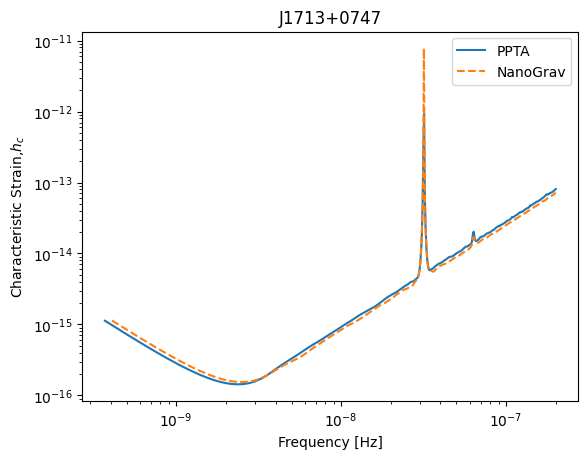

In [ ]:
plt.loglog(spectra_1713.freqs,spectra_1713.h_c, label='PPTA')
plt.loglog(spectra_ng_1713.freqs,spectra_ng_1713.h_c,'--', label='NanoGrav' )
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain,$h_c$')
plt.title("J1713+0747")
plt.legend()
plt.show()

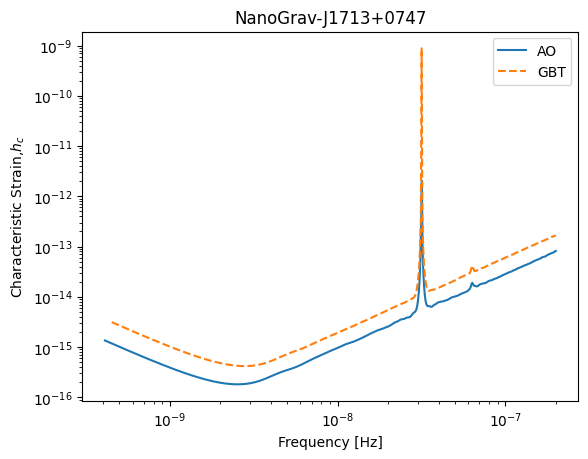

In [ ]:
plt.loglog(spectra_ng_ao_1713.freqs,spectra_ng_ao_1713.h_c, label='AO' )
plt.loglog(spectra_ng_gbt_1713.freqs,spectra_ng_gbt_1713.h_c, '--', label='GBT' )
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain,$h_c$')
plt.title("NanoGrav-J1713+0747")
plt.legend()
plt.show()

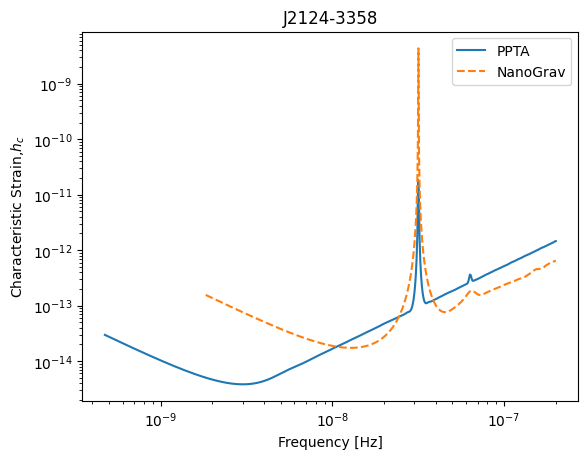

In [ ]:
plt.loglog(spectra_2124.freqs,spectra_2124.h_c, label='PPTA')
plt.loglog(spectra_ng_2124.freqs,spectra_ng_2124.h_c, '--', label='NanoGrav')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain,$h_c$')
plt.title("J2124-3358")
plt.legend()
plt.show()

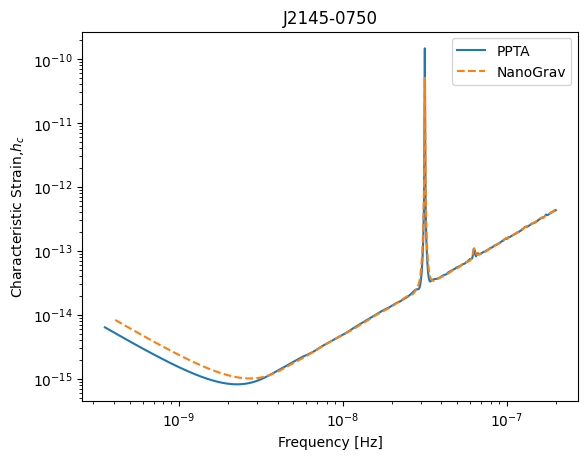

In [ ]:
plt.loglog(spectra_2145.freqs,spectra_2145.h_c, label='PPTA')
plt.loglog(spectra_ng_2145.freqs,spectra_ng_2145.h_c, '--', label='NanoGrav')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain,$h_c$')
plt.title("J2145-0750")
plt.legend()
plt.show()

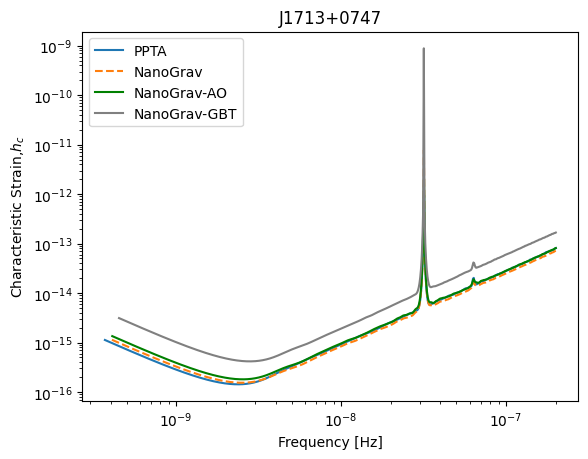

In [ ]:
plt.loglog(spectra_1713.freqs,spectra_1713.h_c, label='PPTA')
plt.loglog(spectra_ng_1713.freqs,spectra_ng_1713.h_c,'--', label='NanoGrav' )
plt.loglog(spectra_ng_ao_1713.freqs,spectra_ng_ao_1713.h_c, color='g', label='NanoGrav-AO' )
plt.loglog(spectra_ng_gbt_1713.freqs,spectra_ng_gbt_1713.h_c, color='grey', label='NanoGrav-GBT' )
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain,$h_c$')
plt.title("J1713+0747")
plt.legend()
plt.show()

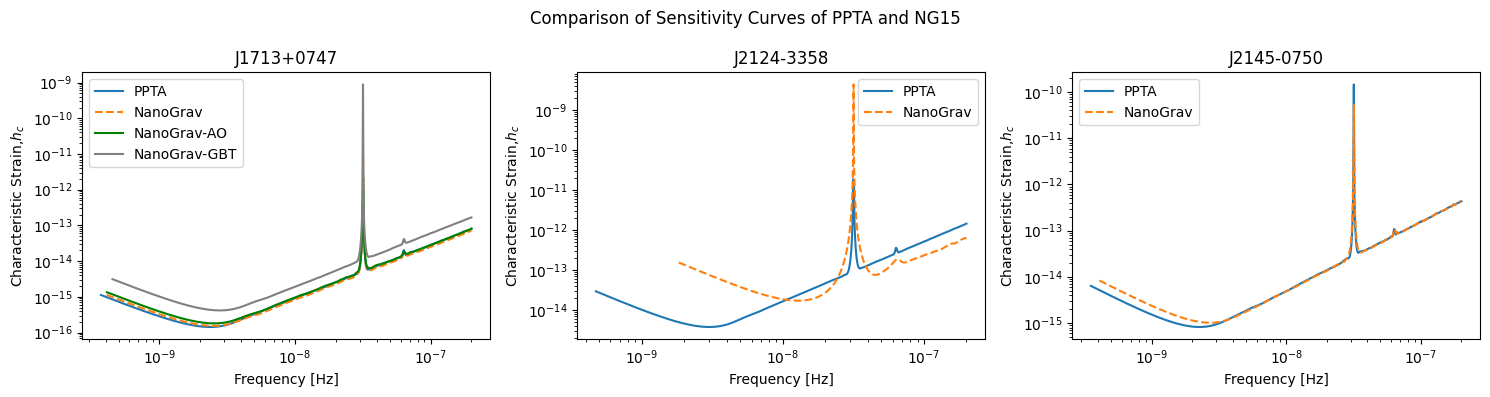

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].loglog(spectra_1713.freqs,spectra_1713.h_c, label='PPTA')
axs[0].loglog(spectra_ng_1713.freqs,spectra_ng_1713.h_c,'--', label='NanoGrav' )
axs[0].loglog(spectra_ng_ao_1713.freqs,spectra_ng_ao_1713.h_c, color='g', label='NanoGrav-AO' )
axs[0].loglog(spectra_ng_gbt_1713.freqs,spectra_ng_gbt_1713.h_c, color='grey', label='NanoGrav-GBT' )
axs[1].loglog(spectra_2124.freqs,spectra_2124.h_c, label='PPTA')
axs[1].loglog(spectra_ng_2124.freqs,spectra_ng_2124.h_c, '--', label='NanoGrav')
axs[2].loglog(spectra_2145.freqs,spectra_2145.h_c, label='PPTA')
axs[2].loglog(spectra_ng_2145.freqs,spectra_ng_2145.h_c, '--', label='NanoGrav')
axs[0].set_title('J1713+0747')
axs[1].set_title('J2124-3358')
axs[2].set_title('J2145-0750')

for ax in axs.flat:
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Characteristic Strain,$h_c$')
    ax.legend()

fig.suptitle('Comparison of Sensitivity Curves of PPTA and NG15')
plt.tight_layout()
plt.show()

In [ ]:
np.shape(spectra_1713.freqs), np.shape(spectra_1713.h_c)

((600,), (600,))

## Comparing Sensitivity Curves

In [ ]:
diff_2124 = np.abs(np.min(spectra_2124.h_c)  - np.min(spectra_ng_2124.h_c))
diff_2145 = np.abs(np.min(spectra_2145.h_c)  - np.min(spectra_ng_2145.h_c))
diff_1713 = np.abs(np.min(spectra_1713.h_c)  - np.min(spectra_ng_1713.h_c))


In [ ]:
diff_2124, diff_2145, diff_1713

(1.3541098665672957e-14, 1.9272558120605274e-16, 1.082828842287857e-17)

In [ ]:
scale_2124 = np.abs(np.min(spectra_ng_2124.h_c) / np.min(spectra_2124.h_c))
scale_2145 = np.abs(np.min(spectra_ng_2145.h_c) / np.min(spectra_2145.h_c))
scale_1713 = np.abs(np.min(spectra_ng_1713.h_c) / np.min(spectra_1713.h_c))
scale_Ng_1713 = np.abs(np.min(spectra_ng_gbt_1713.h_c) / np.min(spectra_ng_ao_1713.h_c))
scale_Ng_1713_1 = np.abs(np.min(spectra_ng_gbt_1713.h_c) / np.min(spectra_1713.h_c))
scale_Ng_1713_2 = np.abs(np.min(spectra_ng_ao_1713.h_c) / np.min(spectra_1713.h_c))
scale_2124, scale_2145, scale_1713, scale_Ng_1713, scale_Ng_1713_1, scale_Ng_1713_2

(4.538845619538398,
 1.23484415660397,
 1.0756698430944567,
 2.3066970346690523,
 2.9100891885539726,
 1.2615827500604084)

In [ ]:
#Frequency difference for J2124-3358
freq_diff_2124 = np.abs(np.min(spectra_2124.freqs) - np.min(spectra_ng_2124.freqs))
freq_diff_2124, np.min(spectra_2124.freqs), np.min(spectra_ng_2124.freqs)

(1.356778491198136e-09, 4.736982616218189e-10, 1.830476752819955e-09)

In [ ]:
freq_scale_2124 = np.abs(np.min(spectra_ng_2124.freqs) / np.min(spectra_2124.freqs))
freq_scale_2124

3.8642251853593073

In [ ]:
HellingsDowns_coeff = hsen.HellingsDownsCoeff(phi=np.array(phi), theta=np.array(theta))
HellingsDowns_coeff

(array([0.5095332 , 0.13801703, 0.45188283]),
 array([0.22150789, 0.46066523, 0.26221493]),
 array([[0, 0, 1],
        [1, 2, 2]]),
 0.5744866102485925)